# t-SNE: Seeing the Invisible Patterns
Welcome! Today, we're going to experience dimensionality reduction through the lens of **t-SNE** — a tool that helps us visualize high-dimensional data like never before.

## ✨ Step 1: Importing Our Magic Tools

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

sns.set(style='whitegrid')

## Step 2: Load the Digits Dataset
This dataset contains 1,797 images of handwritten digits (0 through 9), each represented as an 8x8 pixel grid.

In [2]:
digits = load_digits()
X = digits.data
y = digits.target
print("Data shape:", X.shape)


Data shape: (1797, 64)


**Figure Placeholder**: Raw pixel grid for a few sample digits (use `digits.images`)

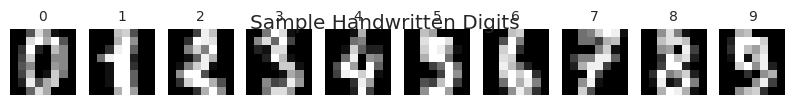

In [3]:
fig, axes = plt.subplots(1, 10, figsize=(10, 1))
for i, ax in enumerate(axes):
    ax.imshow(digits.images[i], cmap='gray')
    ax.axis('off')
    ax.set_title(str(digits.target[i]), fontsize=10)
plt.suptitle("Sample Handwritten Digits")
plt.show()

## Step 3: Scale the Features
Although t-SNE is less sensitive to scale than some methods, it's still good practice to standardize.

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

##  Step 4: PCA (for comparison)
Let's first reduce the dimensions using PCA to 2D — just to see how it compares visually.

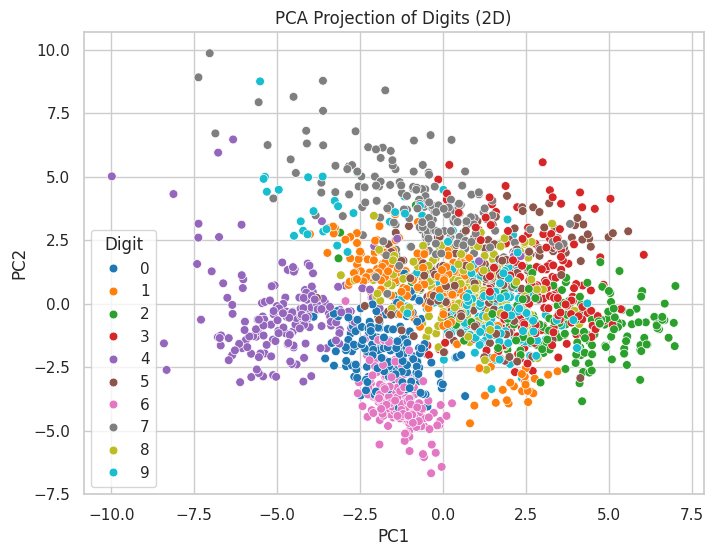

In [5]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='tab10', legend='full', s=40)
plt.title("PCA Projection of Digits (2D)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Digit")
plt.grid(True)
plt.show()

**Figure Placeholder**: 2D PCA projection of digit classes

## 🌌 Step 5: Apply t-SNE
Now for the magic — let’s apply t-SNE to the 64-dimensional data and bring it to 2D.

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


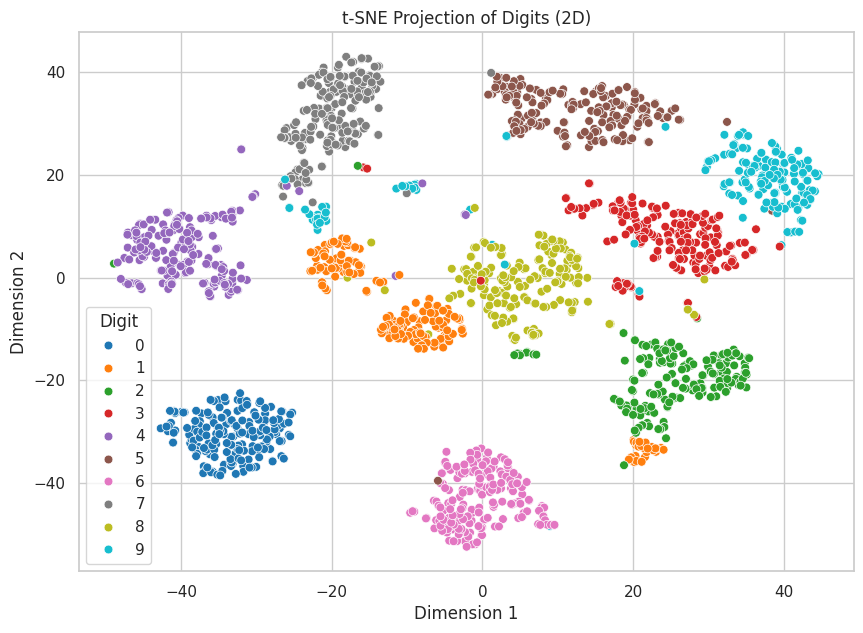

In [6]:
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y, palette='tab10', legend='full', s=40)
plt.title("t-SNE Projection of Digits (2D)")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.legend(title="Digit")
plt.grid(True)
plt.show()

📌 **Figure Placeholder**: 2D t-SNE projection — digit clusters revealed

## 📚 References
- van der Maaten, L., & Hinton, G. (2008). *Visualizing data using t-SNE*. Journal of Machine Learning Research, 9(Nov), 2579–2605.
- Pedregosa, F., Varoquaux, G., Gramfort, A., et al. (2011). *Scikit-learn: Machine Learning in Python*. Journal of Machine Learning Research, 12, 2825–2830.
- Wattenberg, M., Viégas, F., & Johnson, I. (2016). *How to Use t-SNE Effectively*. Distill. https://distill.pub/2016/misread-tsne/
